In [184]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import pandas as pd
import datetime

In [185]:
df = pd.read_csv("test.csv", skiprows=4)

In [186]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 9.5)
df['days'] = (pd.date_range(pd.datetime(1938, 1, 1), pd.datetime(2017, 1, 1), freq='A')).strftime('%Y')

In [187]:
custom_palette = {}
for x, y in zip(df.Anomaly, df.days):
    if x < df.Anomaly.quantile(.2):
        custom_palette[y] = "#b3cde0"
    elif x < df.Anomaly.quantile(.4):
        custom_palette[y] = '#6497b1'
    elif x < df.Anomaly.quantile(.5):
        custom_palette[y] = '#005b96'
    elif x < df.Anomaly.quantile(.7):
        custom_palette[y] = '#03396c'
    else:
        custom_palette[y] = '#4b6fa2'

In [188]:
test = sns.barplot('days', 'Anomaly', data=df,palette=custom_palette, dodge=True)

In [189]:
for ind, label in enumerate(test.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(45)
    else:
        label.set_visible(False)

Now what we need to do is convert the dates and also create a rule base categorical system for coloring the data.

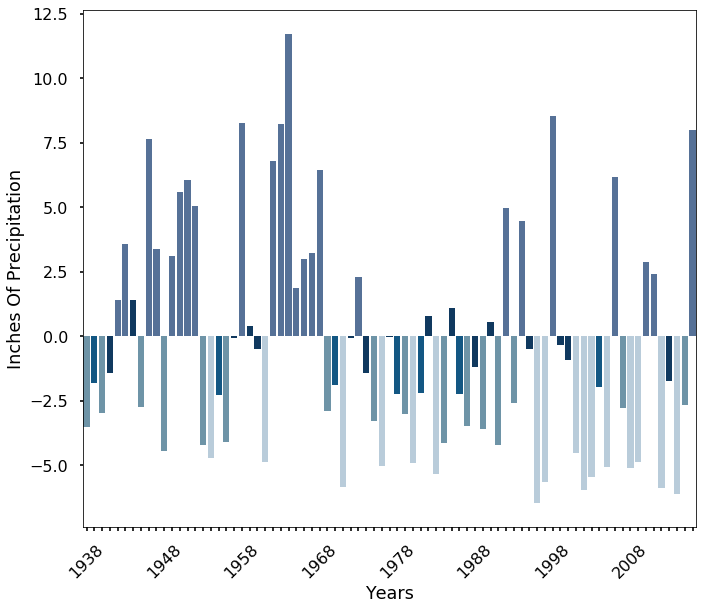

In [190]:
ax.set(xlabel='Years', ylabel='Inches Of Precipitation')
sns.set_context("poster")
plt.show()